In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testset/census-income.test.csv
/kaggle/input/ml1-project/census-income.data.csv


In [2]:
header_names = [
    'age',
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'wage_per_hour',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'instance_weight', ## this field is not used as a feature
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'num_emp',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'weeks_worked',
    'year',
    'income_50k',
]



In [3]:
df1=pd.read_csv("../input/ml1-project/census-income.data.csv",header = None, names = header_names)
df2=pd.read_csv("../input/testset/census-income.test.csv",header = None, names = header_names)

df = pd.concat([df1, df2]) #The test file, labeled so it can be merged with original 
df.drop(columns = ['instance_weight'])

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
99758,61,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
99759,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,- 50000.
99760,30,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [4]:
## Create a new variable for classification based of if the person recieved a 
## college degree
higer_degrees = [
    ' Bachelors degree(BA AB BS)', 
    ' Masters degree(MA MS MEng MEd MSW MBA)', 
    ' Prof school degree (MD DDS DVM LLB JD)',
    ' Doctorate degree(PhD EdD)',
]

df['graduated'] = 'no'
df.loc[df['education'].isin(higer_degrees), 'graduated'] = 'yes'

In [5]:
df.shape
df.head()
list(df.columns)

['age',
 'class_worker',
 'det_ind_code',
 'det_occ_code',
 'education',
 'wage_per_hour',
 'hs_college',
 'marital_stat',
 'major_ind_code',
 'major_occ_code',
 'race',
 'hisp_origin',
 'sex',
 'union_member',
 'unemp_reason',
 'full_or_part_emp',
 'capital_gains',
 'capital_losses',
 'stock_dividends',
 'tax_filer_stat',
 'region_prev_res',
 'state_prev_res',
 'det_hh_fam_stat',
 'det_hh_summ',
 'instance_weight',
 'mig_chg_msa',
 'mig_chg_reg',
 'mig_move_reg',
 'mig_same',
 'mig_prev_sunbelt',
 'num_emp',
 'fam_under_18',
 'country_father',
 'country_mother',
 'country_self',
 'citizenship',
 'own_or_self',
 'vet_question',
 'vet_benefits',
 'weeks_worked',
 'year',
 'income_50k',
 'graduated']

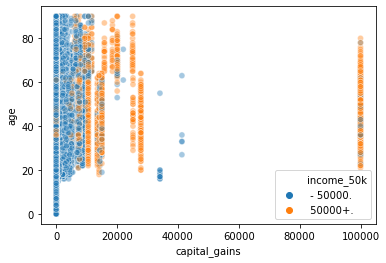

In [6]:
sns.scatterplot(data=df, x="capital_gains", y="age", hue="income_50k", alpha=.4)

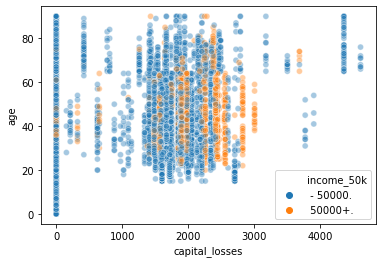

In [7]:
sns.scatterplot(data=df, x="capital_losses", y="age", hue="income_50k", alpha=.4)

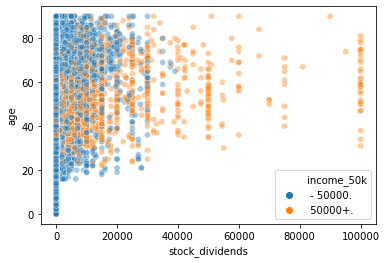

In [8]:
sns.scatterplot(data=df, x="stock_dividends", y="age", hue="income_50k", alpha=.4)

In [9]:
cols_to_keep=[
    'age', 
    'education', 
    'race', 
    'sex', 
    'capital_gains', 
    'capital_losses', 
    'stock_dividends', 
    'tax_filer_stat', 
    'det_hh_summ', 
    'own_or_self', 
    'vet_benefits', 
    'weeks_worked',
    'income_50k'
]

df_trunc = df.loc[:,cols_to_keep]

df_trunc.head()

,age,education,race,sex,capital_gains,capital_losses,stock_dividends,tax_filer_stat,det_hh_summ,own_or_self,vet_benefits,weeks_worked,income_50k
0,73,High school graduate,White,Female,0,0,0,Nonfiler,Other relative of householder,0,2,0,- 50000.
1,58,Some college but no degree,White,Male,0,0,0,Head of household,Householder,0,2,52,- 50000.
2,18,10th grade,Asian or Pacific Islander,Female,0,0,0,Nonfiler,Child 18 or older,0,2,0,- 50000.
3,9,Children,White,Female,0,0,0,Nonfiler,Child under 18 never married,0,0,0,- 50000.
4,10,Children,White,Female,0,0,0,Nonfiler,Child under 18 never married,0,0,0,- 50000.


In [10]:
ind_cols=['education', 'race', 'sex', 'tax_filer_stat', 'det_hh_summ']

df_trunc.loc[:,ind_cols].head()


,education,race,sex,tax_filer_stat,det_hh_summ
0,High school graduate,White,Female,Nonfiler,Other relative of householder
1,Some college but no degree,White,Male,Head of household,Householder
2,10th grade,Asian or Pacific Islander,Female,Nonfiler,Child 18 or older
3,Children,White,Female,Nonfiler,Child under 18 never married
4,Children,White,Female,Nonfiler,Child under 18 never married


In [11]:
# perform one-hot encoding 
tmp_df = pd.get_dummies(df_trunc.loc[:,ind_cols])
df_trunc=df_trunc.drop(['education', 'race', 'sex', 'tax_filer_stat', 'det_hh_summ'], axis=1)
df_trunc_ind = pd.concat((df_trunc,tmp_df),axis=1) # add back into the dataframe

list(df_trunc_ind.columns)

['age',
 'capital_gains',
 'capital_losses',
 'stock_dividends',
 'own_or_self',
 'vet_benefits',
 'weeks_worked',
 'income_50k',
 'education_ 10th grade',
 'education_ 11th grade',
 'education_ 12th grade no diploma',
 'education_ 1st 2nd 3rd or 4th grade',
 'education_ 5th or 6th grade',
 'education_ 7th and 8th grade',
 'education_ 9th grade',
 'education_ Associates degree-academic program',
 'education_ Associates degree-occup /vocational',
 'education_ Bachelors degree(BA AB BS)',
 'education_ Children',
 'education_ Doctorate degree(PhD EdD)',
 'education_ High school graduate',
 'education_ Less than 1st grade',
 'education_ Masters degree(MA MS MEng MEd MSW MBA)',
 'education_ Prof school degree (MD DDS DVM LLB JD)',
 'education_ Some college but no degree',
 'race_ Amer Indian Aleut or Eskimo',
 'race_ Asian or Pacific Islander',
 'race_ Black',
 'race_ Other',
 'race_ White',
 'sex_ Female',
 'sex_ Male',
 'tax_filer_stat_ Head of household',
 'tax_filer_stat_ Joint both 65+

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df_trunc_ind.copy()

cols_to_scale = ['capital_gains', 'capital_losses', 'stock_dividends']

features = df_scaled[cols_to_scale]

scaler = StandardScaler().fit(features.values)

features = scaler.transform(features.values)

df_scaled[cols_to_scale] = features

df_scaled.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 46 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   age                                                299285 non-null  int64  
 1   capital_gains                                      299285 non-null  float64
 2   capital_losses                                     299285 non-null  float64
 3   stock_dividends                                    299285 non-null  float64
 4   own_or_self                                        299285 non-null  int64  
 5   vet_benefits                                       299285 non-null  int64  
 6   weeks_worked                                       299285 non-null  int64  
 7   income_50k                                         299285 non-null  object 
 8   education_ 10th grade                              299285 non-null  uint8  

In [13]:
for col in ["own_or_self", "vet_benefits", "weeks_worked", "income_50k"]:
    df_scaled[col] = df_scaled[col].astype('category')
    
df_scaled.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 46 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   age                                                299285 non-null  int64   
 1   capital_gains                                      299285 non-null  float64 
 2   capital_losses                                     299285 non-null  float64 
 3   stock_dividends                                    299285 non-null  float64 
 4   own_or_self                                        299285 non-null  category
 5   vet_benefits                                       299285 non-null  category
 6   weeks_worked                                       299285 non-null  category
 7   income_50k                                         299285 non-null  category
 8   education_ 10th grade                              299285 non-nul

In [14]:
from sklearn.model_selection import train_test_split

y = df_scaled['income_50k']

X = df_scaled.drop('income_50k', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
y.unique()


[' - 50000.', ' 50000+.']
Categories (2, object): [' - 50000.', ' 50000+.']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=100000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, lr.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 
# print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

95.1% accuracy on test set.
{'age': 0.04, 'capital_gains': 0.53, 'capital_losses': 0.17, 'stock_dividends': 0.35, 'own_or_self': 0.09, 'vet_benefits': 0.42, 'weeks_worked': 0.05, 'education_ 10th grade': 1.23, 'education_ 11th grade': 0.8, 'education_ 12th grade no diploma': 0.65, 'education_ 1st 2nd 3rd or 4th grade': 1.5, 'education_ 5th or 6th grade': 1.57, 'education_ 7th and 8th grade': 1.28, 'education_ 9th grade': 1.2, 'education_ Associates degree-academic program': 0.51, 'education_ Associates degree-occup /vocational': 0.3, 'education_ Bachelors degree(BA AB BS)': 1.29, 'education_ Children': 1.77, 'education_ Doctorate degree(PhD EdD)': 2.29, 'education_ High school graduate': 0.26, 'education_ Less than 1st grade': 1.82, 'education_ Masters degree(MA MS MEng MEd MSW MBA)': 1.75, 'education_ Prof school degree (MD DDS DVM LLB JD)': 2.5, 'education_ Some college but no degree': 0.23, 'race_ Amer Indian Aleut or Eskimo': 0.81, 'race_ Asian or Pacific Islander': 0.58, 'race_ Bl

In [ ]:
# from sklearn.svm import SVC
# 
# svc = SVC()
# 
# # Fit the model to the training data
# svc.fit(X_train, y_train)
# 
# # Calculate accuracy scores on both train and test data
# accuracy_train = accuracy_score(y_train, svc.predict(X_train))
# accuracy_test = accuracy_score(y_test, svc.predict(X_test))
# 
# print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

In [ ]:
# from sklearn.feature_selection import RFE
# # Create the RFE with a LogisticRegression estimator and 3 features to select
# rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10, verbose=1)
# 
# # Fits the eliminator to the data
# rfe.fit(X_train, y_train)
# 
# # Print the features and their ranking (high = dropped early on)
# print(dict(zip(X.columns, rfe.ranking_)))
# 
# # Print the features that are not eliminated
# print(X.columns[rfe.support_])
# 
# # Calculates the test set accuracy
# acc = accuracy_score(y_test, rfe.predict(X_test))
# print("{0:.1%} accuracy on test set.".format(acc)) 